In [ ]:
library(glmnet)

In [2]:
library(SouthSeattleHealthImpacts)

Loading required package: Dataset
Loading required package: SubjectHistory
Loading required package: RUnit


In [9]:
f <- system.file(package="SouthSeattleHealthImpacts", "extdata", "allFactors.tsv")
file.exists(f)
tbl <- read.table(f, sep="\t", header=TRUE)
mtx <- as.matrix(tbl[,-1])
rownames(mtx) <- tbl$zipCode
dim(mtx)

[1] TRUE

[1] 10 24

In [57]:
colnames(mtx)

[1] "no.college.degree"                 "below.200pc.Poverty.Level"        
 [3] "Non.white.minority.population"     "Adults.No.Health.Insurance"       
 [5] "Adults.No.Leisure.Time"            "Percent.Under.5.years"            
 [7] "Percent.65.Years.and.Older"        "Percent.Foreign.born"             
 [9] "Diesel"                            "Benzene"                          
[11] "Hazard.Ranking"                    "Tree.Canopy"                      
[13] "sq.ft.park.person"                 "toxic.facilities"                 
[15] "life.expectancy.at.birth"          "overweight.or.obese"              
[17] "heart.dz.death.per.100k"           "stroke.deaths.per.100k"           
[19] "percent.diabetes"                  "percent.hypertension"             
[21] "child.hospitalization.asthma.rate" "percent.adult.smokers"            
[23] "lung.cancer.death.per.100k"        "assault.hosp.per.100k"

In [5]:
mtx[1:5, 1:5]

,no.college.degree,below.200pc.Poverty.Level,Non.white.minority.population,Adults.No.Health.Insurance,Adults.No.Leisure.Time
98102,31.7,22.5,17.5,6.0,14.0
98105,23.8,39.5,28.6,10.0,9.0
98106,65.0,27.3,48.8,17.0,15.0
98107,41.4,18.9,13.8,7.0,11.0
98108,71.7,32.4,71.2,14.0,30.0


In [6]:
targetColumn <- grep("asthma", colnames(mtx))

In [7]:
targetColumn

[1] 21

In [12]:
mtx

,no.college.degree,below.200pc.Poverty.Level,Non.white.minority.population,Adults.No.Health.Insurance,Adults.No.Leisure.Time,Percent.Under.5.years,Percent.65.Years.and.Older,Percent.Foreign.born,Diesel,Benzene,⋯,life.expectancy.at.birth,overweight.or.obese,heart.dz.death.per.100k,stroke.deaths.per.100k,percent.diabetes,percent.hypertension,child.hospitalization.asthma.rate,percent.adult.smokers,lung.cancer.death.per.100k,assault.hosp.per.100k
98102,31.7,22.5,17.5,6,14,2.1,7,11.3,2.2,2.9,⋯,83.6,48,110.7,37,2,16,182,16,23.4,20.4
98105,23.8,39.5,28.6,10,9,3.4,5.8,14.8,1.3,2.03,⋯,86.6,38,103.6,15.4,2,11,273.1,4,29.2,18.4
98106,65,27.3,48.8,17,15,7.5,7.6,21.3,1.4,1.8,⋯,78.7,62,158.5,48.8,6,22,261,11,42,67.4
98107,41.4,18.9,13.8,7,11,5,8.7,9.2,0.9,1.6,⋯,81.1,49,144.3,38,6,25,182.2,10,50.5,24.3
98108,71.7,32.4,71.2,14,30,6.8,12,41.5,2.3,2.7,⋯,80.8,55,123.3,48.7,6,23,299.1,10,41.4,65.4
98116,45.3,15.4,13,18,14,5.5,13.6,7.7,1.7,2.3,⋯,82,60,126.8,35.8,6,24,161.4,10,26.6,13.2
98122,40.4,30.9,36.6,18,19,4.2,7.4,15.2,1.7,2.5,⋯,76.6,55,188.3,52.4,5,20,245.9,11,51.6,82.7
98144,56.8,32.9,56.2,12,13,5.9,12.9,26.6,0.7,1.7,⋯,80.5,50,124.5,40.7,4,26,279.9,9,40.8,79.9
98178,71.8,29.9,70.1,16,21,6.9,12.1,33.6,1.05,1.7,⋯,79.1,59,120.8,24.5,11,36,164.7,15,62.5,65
98199,32.2,11.8,14.1,2,9,5.7,13.9,11.6,1.03,1.8,⋯,84.7,50,153.9,36.7,4,24,128.9,4,37.2,7.4


In [51]:
columns.to.remove <- sort(c(targetColumn)) # , grep("Poverty", colnames(mtx))))

In [52]:
columns.to.remove

[1] 21

In [53]:
predictors <- mtx[, -(columns.to.remove)]
target <- mtx[, targetColumn]

In [ ]:
predictors

In [54]:
fit <- glmnet(predictors, target)

"fit” is an object of class glmnet that contains all the relevant information of the fitted model for further use. We do not encourage users to extract the components directly. Instead, various methods are provided for the object such as plot, print, coef and predict that enable us to execute those tasks more elegantly.

We can visualize the coefficients by executing the plot function:

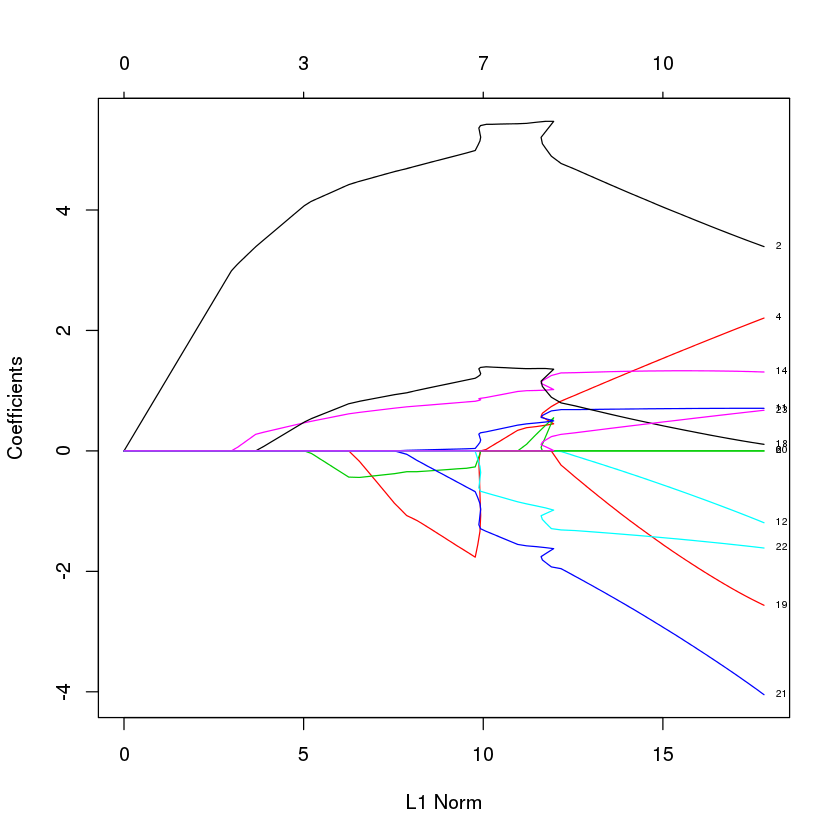

In [55]:
plot(fit, label=TRUE)

In [56]:
colnames(predictors)[c(2,14,18)]

[1] "below.200pc.Poverty.Level" "toxic.facilities"         
[3] "stroke.deaths.per.100k"

In [58]:
colnames(predictors)[c(21, 18, 22, 12)]

[1] "percent.adult.smokers"      "stroke.deaths.per.100k"    
[3] "lung.cancer.death.per.100k" "Tree.Canopy"

Each curve corresponds to a variable. It shows the path of its coefficient against the ℓ1-norm of the whole coefficient vector at as λ varies. The axis above indicates the number of nonzero coefficients at the current λ, which is the effective degrees of freedom (df) for the lasso. Users may also wish to annotate the curves; this can be done by setting label = TRUE in the plot command.

A summary of the glmnet path at each step is displayed if we just enter the object name or use the print function:

In [45]:
print(fit)


Call:  glmnet(x = predictors, y = target) 

      Df    %Dev  Lambda
 [1,]  0 0.00000 35.3500
 [2,]  1 0.03402 33.7500
 [3,]  1 0.06502 32.2100
 [4,]  1 0.09327 30.7500
 [5,]  1 0.11900 29.3500
 [6,]  1 0.14250 28.0200
 [7,]  1 0.16380 26.7400
 [8,]  1 0.18330 25.5300
 [9,]  1 0.20100 24.3700
[10,]  3 0.24380 23.2600
[11,]  3 0.29740 22.2000
[12,]  4 0.34850 21.1900
[13,]  4 0.39630 20.2300
[14,]  4 0.43970 19.3100
[15,]  4 0.47930 18.4300
[16,]  4 0.51540 17.5900
[17,]  4 0.54830 16.8000
[18,]  4 0.57830 16.0300
[19,]  4 0.60560 15.3000
[20,]  4 0.63050 14.6100
[21,]  4 0.65310 13.9400
[22,]  4 0.67380 13.3100
[23,]  4 0.69260 12.7000
[24,]  4 0.70980 12.1300
[25,]  4 0.72540 11.5800
[26,]  4 0.73960 11.0500
[27,]  4 0.75260 10.5500
[28,]  4 0.76440 10.0700
[29,]  5 0.77700  9.6110
[30,]  5 0.78930  9.1740
[31,]  5 0.80060  8.7570
[32,]  5 0.81080  8.3590
[33,]  5 0.82020  7.9790
[34,]  5 0.82870  7.6160
[35,]  5 0.83640  7.2700
[36,]  6 0.84420  6.9400
[37,]  6 0.85360  6.6240
[38,]

This shows from left to right the number of nonzero coefficients (Df), the percent (of null) deviance explained (%dev) and the value of λ(Lambda). Although by default glmnet calls for 100 values of lambda the program stops early if %dev% does not change sufficently from one lambda to the next (typically near the end of the path.)
We can obtain the actual coefficients at one or more λ’s within the range of the sequence:

In [46]:
coef(fit,s=0.1)

23 x 1 sparse Matrix of class "dgCMatrix"
                                        1
(Intercept)                   389.2413723
no.college.degree               .        
Non.white.minority.population   0.2201790
Adults.No.Health.Insurance      2.4551784
Adults.No.Leisure.Time          .        
Percent.Under.5.years           .        
Percent.65.Years.and.Older      .        
Percent.Foreign.born            .        
Diesel                          .        
Benzene                         .        
Hazard.Ranking                  0.3304203
Tree.Canopy                    -2.0495194
sq.ft.park.person               .        
toxic.facilities                0.6794917
life.expectancy.at.birth        .        
overweight.or.obese             .        
heart.dz.death.per.100k        -0.5175294
stroke.deaths.per.100k          .        
percent.diabetes                .        
percent.hypertension           -4.3816630
percent.adult.smokers          -6.5482142
lung.cancer.death.per.100k     -0.

The function glmnet returns a sequence of models for the users to choose from. In many cases, users may prefer the software to select one of them. Cross-validation is perhaps the simplest and most widely used method for that task.

cv.glmnet is the main function to do cross-validation here, along with various supporting methods such as plotting and prediction. We still act on the sample data loaded before.


In [59]:
cvfit = cv.glmnet(predictors, target)

Warning message:
: Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold

cv.glmnet returns a cv.glmnet object, which is “cvfit” here, a list with all the ingredients of the cross-validation fit. As for glmnet, we do not encourage users to extract the components directly except for viewing the selected values of λ. The package provides well-designed functions for potential tasks.

We can plot the object.

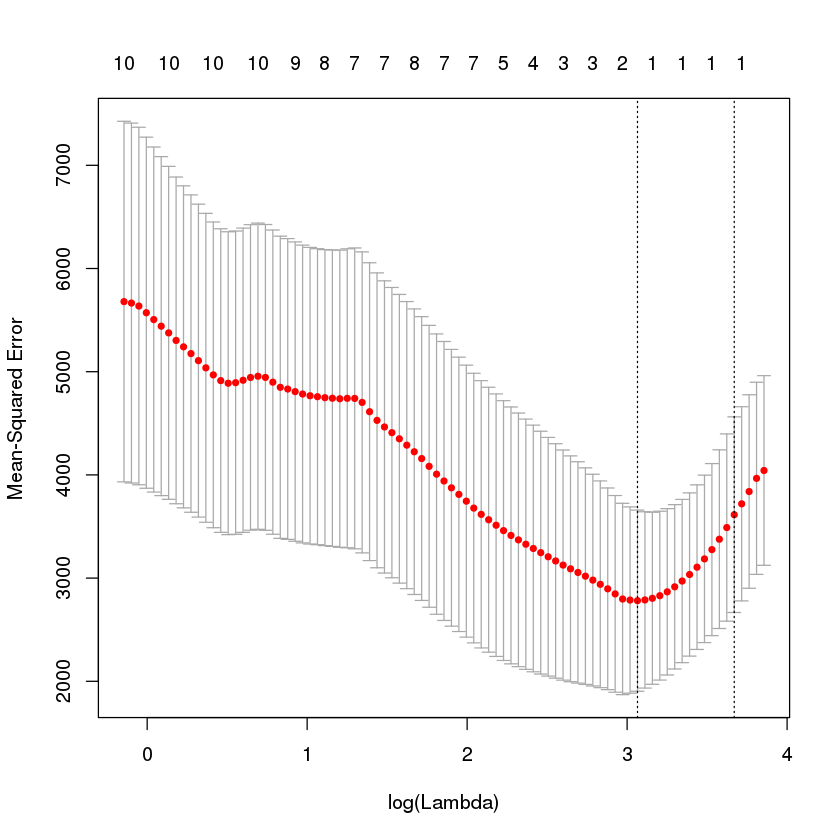

In [60]:
plot(cvfit)

It includes the cross-validation curve (red dotted line), and upper and lower standard deviation curves along the λ sequence (error bars). Two selected λλ’s are indicated by the vertical dotted lines (see below).

We can view the selected λ’s and the corresponding coefficients. For example,

In [61]:
cvfit$lambda.min

[1] 21.4312

lambda.min is the value of λλ that gives minimum mean cross-validated error. The other λλ saved is lambda.1se, which gives the most regularized model such that error is within one standard error of the minimum. To use that, we only need to replace lambda.min with lambda.1se above.

In [62]:
coef(cvfit, s = "lambda.min")

24 x 1 sparse Matrix of class "dgCMatrix"
                                         1
(Intercept)                   136.33244471
no.college.degree               .         
below.200pc.Poverty.Level       3.10058476
Non.white.minority.population   .         
Adults.No.Health.Insurance      .         
Adults.No.Leisure.Time          .         
Percent.Under.5.years           .         
Percent.65.Years.and.Older      .         
Percent.Foreign.born            .         
Diesel                          .         
Benzene                         .         
Hazard.Ranking                  .         
Tree.Canopy                     .         
sq.ft.park.person               .         
toxic.facilities                0.05989174
life.expectancy.at.birth        .         
overweight.or.obese             .         
heart.dz.death.per.100k         .         
stroke.deaths.per.100k          .         
percent.diabetes                .         
percent.hypertension            .         
percent.adul

In [33]:
log(21.4311)

[1] 3.064843